# Characterizing Filters and Frequency Responses

### EE 16B: Designing Information Devices and Systems II, Spring 2018

**Name 1**:

**Login**: ee16b-


**Name 2**:

**Login**: ee16b-


## Table of Contents


* [Introduction](#intro)
* [Task 1: Solder mic board](#task1)
* [Task 2: Capacitor Value](#task2)
* [Task 3: Switching the Filter](#task3)

<a id='intro'></a>
## Introduction

In this lab, you will gain experience with frequency responses in two different contexts. First, you will solder together a microphone PCB (mic board). Second, you will determine the value of a capacitor by measuring the response of an RC filter. Finally, you will measure the frequency response of a speaker-microphone system to assist with Color Organ, the lab for the next two weeks.

<a id='task1'></a>
## <span style="color:blue">Task 1: Solder your mic board</span>
(See MicBoard.pdf)
### Materials
- 1 x microphone
- 1 x Op Amp
- 1 x 8-pin socket
- 2 x 1 uF Capacitors
- 1 x 10 k$\Omega$ Resistor
- 1 x 1 k$\Omega$ Resistor
- 1 x 50 k$\Omega$ Potentiometer
- 6 x Jumper pins (don't break apart!)
- 1 x Mic board PCB



<a id='task2'></a>
## <span style="color:blue">Task 2: Capacitor Value</span>

### Materials
- Mystery Capacitor
- Known Resistor
- Oscilloscope
- Power Supply

To measure the value of the capacitor, we can use a circuit similar to the voltage divider. However, recall that capacitors can act like very small or very large resistors depending on the frequency of the input. This means we will have to look at the circuit output over several frequencies to estimate its value.

Let us derive the transfer function $H(jw) = \frac{V_{out}}{V_{in}}$ for the resistor, capacitor voltage divider shown below (In the diagram below $V_{in}$ is where 3V is shown):

Impedance for a Resistor: $Z_{R} = R$

Impedence for a Capacitor: $Z_{C}= \frac{1}{j\omega C}$

Voltage divider with complex impedances: $V_{out} = V_{in}\frac{Z_C}{Z_C + Z_R}$

$V_{out} = V_{in}\frac{\frac{1}{j\omega C}}{\frac{1}{j\omega C} + R}$

$H(jw) = \frac{V_{out}}{V_{in}} = \frac{1}{j\omega RC + 1}$

This transfer function characterizes the response of the RC circuit, shown below, to inputs of varying frequency. By plugging in different frequencies for $\omega$ we can see that the circuit attenuates the magnitude of inputs with a higher frequencies while allowing lower frequencies to pass through relatively unattenuated. This filter is known as a low pass filter. A more intuitive explanation of the filter's frequency response is given in the paragraphs below.

<img style="width: 250px" src="images/co-low-pass-filt-v2.png">

Let us begin by intuitively examining the capacitor in the voltage divider pictured above.

Recall that, if one component's impedence is much larger than the other, then almost all of the voltage is dropped across that larger component. So, if the top component is the large one, then the output voltage will be very small. If the bottom component is large, then the output voltage will be very large. 

Now, lets think about capacitors. Capacitors let high frequency signals pass through, but stop low frequency signals. So, at high frequencies capacitors act like a small impedance, and at low frequencies capacitors act like a large impedance. 

<img style="width: 250px" src="images/ac-dc-capacitor.png">


**<span style="color:red">If the voltage source $V_{src}$ has a very low frequency, will $V_o$ be large or small?</span>**

YOUR ANSWER HERE

**<span style="color:red">If the voltage source $V_{src}$ has a very high frequency, will $V_o$ be large or small?</span>**

YOUR ANSWER HERE

You will now test your prediction, and examine the change in amplitude of the output voltage at high and low frequencies. **Use your function generator as your voltage source** and your oscilloscope to measure the amplitude of the output signal. <i> Remember to connect all the grounds of the circuit together! </i> Set the following parameters on the function generator:
- Amplitude: 3 Vpp
- DC Offset: 0 V
- Frequency: the values in `freq` below
- Output Load: High Z

Remember that the the amplitude values on the function generator are peak-to-peak

**First, record the amplitide of the input signal as `Vsrc`. Then, test each frequency in array `freq` and record your results in `Amplitude`.**

### **<span style="color:red">Use the measurement feature of the oscilloscope to automatically display the peak-to-peak voltage of the signal! Don't manually use the cursors.</span>**

**You may find that your signal either attenuates immediately or not at all.** That doesn't mean your circuit is wrong! Let's look at two extreme examples.

### **<span style="color:red">Make sure that your plot contains the full response of the filter! At one end the *gain* should appproach $0$ and at the other it should approach $1$. </span>**

$$C_{myst}=100\mu\text{F}$$
$$R=10\text{k}\Omega$$
$$\implies f_c=\frac{1}{2\pi 10^{-4}\text{F}\ 10^4\Omega}=0.159\text{Hz}$$

$$C_{myst}=1\text{nF}$$
$$R=10\Omega$$
$$\implies f_c=\frac{1}{2\pi 10^{-9}\text{F}\ 10\Omega}=15.9\text{MHz}$$

**Keep this in mind when choosing your resistor.** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

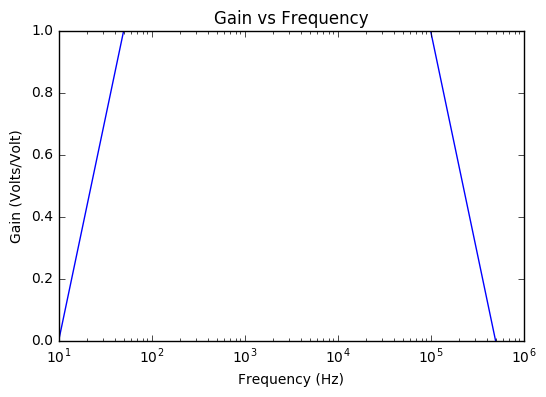

In [2]:
Vsrc = 3

freq = [10, 50, 100, 500, 1e3, 5e3, 10e3, 50e3, 100e3, 500e3]
Amplitude = [0,3,3,3,3,3,3,3,3,0]

Gain = np.array(Amplitude)/Vsrc

p = plt.semilogx(freq, Gain)
plt.title('Gain vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volt)')

Let's look at the graph we just made. Notice that it graphs and voltage gain on log axes as a Bode plot.

You will notice in your graph that the amplitude is relatively constant in low frequencies, but drops suddenly at high frequencies. This kind of resistor-capacitor combination is referred to as a **Low Pass Filter**. It lets low frequencies pass as large voltages, whereas high frequencies are attenuated. The point where the magnitude drops suddenly is known by many names such as the **corner frequency, cutoff frequency, and 3dB point**.

What makes this corner frequency special? This is the frequency where the power at the output is half the power of the unfiltered frequencies (<b>power </b>, not voltage). In this simple RC circuit, you can also think of it as the point where the capacitor acts like the same size impedance as the resistor.

This corner in the frequency response happens very quickly, and we want to identify right where it happens so that we can solve accurately for the value of the capacitor. To do this, look at your graph and identify the amplitude of the unattenuated frequencies (freqencies in the passband).


**<span style="color:red">What is the passband amplitude? (ie: What is the voltage where the signal is not attenuated?)</span>**

YOUR ANSWER HERE


Since you are looking for the half power point, and not the half voltage point, you will divide the maximum voltage amplitude by $\sqrt{2}$. (Recall that $P=IV=V^2/R $. For $P/2$ and the same $R$, we need $(V/\sqrt{2})^2 = V^2 / 2$). Look at the graph you just made and estimate where you expect your corner frequency to be. 

**Now, turn the knob on your frequency generator and watch the amplitude of the outuput on your scope. Turn until you find the frequency where the amplitude is $\frac{V_{max}}{\sqrt{2}}$. That is your corner frequency.**

Record extra data near the corner frequency to get a better plot of the frequency response.

**<span style="color:red">What is the corner frequency?</span>**

YOUR ANSWER HERE


Now that you know your corner frequency and your resistor value, you can solve for your capacitor value. Remember that we are using Hertz (1/s) to measure our frequencies from the function generator, but we like to use radians when we do math.

The corner frequency occurs at: 
$$f_{corner} = \frac{1}{2\pi RC}$$

In [3]:
C_myst = 0

print(C_myst)

0


**<span style="color:red">What is the value of your capacitor?</span>**

YOUR ANSWER HERE

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 1</span>
 <span style="color:green">Show your GSI your frequency response graph with the extra points around your corner frequency, and your estimated capacitance value.</span>

What happens when you switch the resistor and capacitor in the filter. 
Perform the same analysis we did above for the low pass filter. What types of frequencies do you expect to be stopped this time?

Let us derive the transfer function $H(jw) = \frac{V_{out}}{ V_{in}}$ for the resistor, capacitor voltage divider shown below:

Impedance of R: $Z_R = R$

Impedance of C: $Z_C = \frac{1}{j\omega_c}$

Voltage divider with complex impedences: $V_{out} = V_{in}\frac{Z_R}{Z_R + Z_C}$

$V_{out} = V_{in}\frac{R}{R + \frac{1}{j \omega_c}}$

$H(j\omega) = \frac{V_{out}}{V_{in}} = \frac{j\omega RC}{j\omega RC + 1}$

You can use the above transfer function to analyze how the circuit depicted below responds to inputs of different frequencies. This transfer function is for a low pass filter. By plugging in different values for the frequency we can see how the filter attenuates the magnitude of higher frequencies while allowing lower frequencies to pass through relatively unattenuated.

<img style="width: 250px" src="images/co-high-pass-filt-v2.png">

**Again, use the function generator and the o-scope to collect the amplitude of $V_{in}$, and of $V_{out}$ at each frequency of array f.**

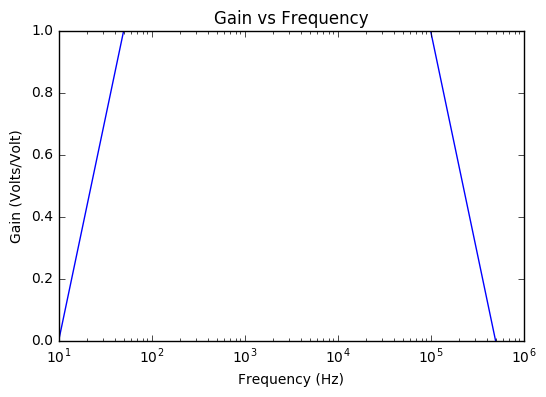

In [4]:
#Record the amplitude of the output sinusoid at each given frequency
Vsrc = 3
freq = [10, 50, 100, 500, 1e3, 5e3, 10e3, 50e3, 100e3, 500e3]
Amplitude = [0,3,3,3,3,3,3,3,3,0]

Gain = np.array(Amplitude)/Vsrc

p = plt.semilogx(freq, Gain)
plt.title('Gain vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volt)')

What do you notice about the shape of this filter compared to the previous filter? What about the corner frequency? 


**<span style="color:red">What is an appropriate name for this type of filter?</span>**

YOUR ANSWER HERE

**<span style="color:red">Has the corner frequency moved? Why or why not?</span>**

YOUR ANSWER HERE

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 2</span>
 <span style="color:green">Be able to explain how changing the capacitor placement changed the filter response.</span>
 
### **<span style="color:red">Give back your mystery capacitor!</span>**

Great job! You have solved the mystery and learned how to design and characterize a filter. These skills will come in handy for the next lab, Color Organ!

<a id='task3'></a>
## <span style="color:blue">Task 3: Testing your micboard</span>

### Materials
- Micboard
- Pure tone generator (smart phone)
- Oscilloscope
- Power Supply

Now that you have measured the frequency response of a simple circuit, you will investigate how your mic board responds to audio signals of different frequencies. These results will help you choose amplifier gains for the Color Organ lab over the next two weeks.

Power your mic board, and probe its output with your oscilloscope. For details on how to power your mic, refer to the end of the MicBoard PDF file. Play pure tones to the mic board off of your phone using a website like the ones listed below. They should be top results if you search "tone generator".

## **<span style="color:red">If you have an iPhone, make sure it isn't silenced!</span>**

http://www.szynalski.com/tone-generator/

http://onlinetonegenerator.com/


You should see something like this:

<img style="width: 500px" src="images/puretone_micboard.jpg">

## **<span style="color:red">Set the gain of your mic board using the potentiometer so you get a maximum peak-to-peak voltage of 4-5 volts</span>**

Keep your smart phone at a fixed distance from your micboard.  (You will need to place the phone at a distance from the micboard which ensures no audio frequency causes the mic output to rail (hit Vdd or Vss from the power supply).

Use the oscilloscope to collect the amplitude of $V_{out}$ at each frequency of array f. We no longer have a measurable input signal $V_{in}$, so we normalize the maximum of the frequency response to 1. We'll use this information to build next week's circuit with an even response across all frequencies.



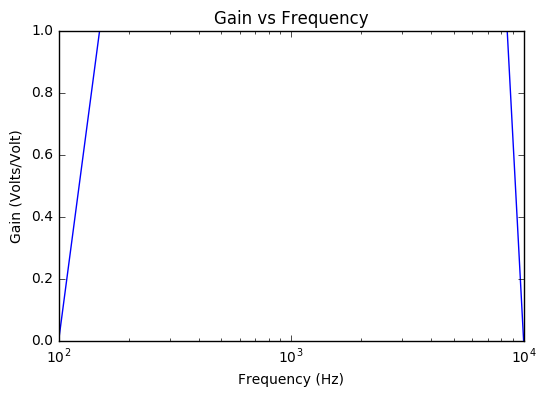

In [5]:
#Record the amplitude of the output sinusoid at each given frequency
freq = [100, 150, 200, 300, 450, 600, 800, 1000, 1500, 2000, 3000, 4000, 5500, 7000, 8500, 10000]
Vpp = [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]

Gain = np.array(Vpp)/max(Vpp)

p = plt.semilogx(freq, Gain)
plt.title('Gain vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (Volts/Volt)')

What do you notice about the shape of this function?  Which frequencies result in large output?  


<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKOFF</span>

### <span style="color:green">**Give back your mystery capacitor!**</span>
<span style="color:green">
Complete <a href="https://goo.gl/forms/bzlzPgYRSucIuIlH3">this quiz</a>.<br/>
Show capacitor calculations and filter frequency responses.<br/>
Explain why changing capacitor location changes the frequency response.<br/>
Show mic board working and its frequency response.<br/>
Explain what you would need to build so the mic board produced the same Vpp for each frequency.
</span>
 
## <span style="color:red">Make sure you save this notebook and your mic board measurements for the next lab!</span>